In [339]:
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold
from surprise.reader import Reader
from surprise import accuracy
import numpy as np
import pandas as p

In [353]:
loc = "C:/Users/DFCTech/Downloads/CS155_PROJECT2/data";
train = "train.txt";
test = "test.txt";
alld = "data.txt"
def file(loc, n):
    return "{}/{}".format(loc,n)

def load(loc,filef):
    filename = file(loc,filef)
    return p.read_csv(filename, sep='\t', header=None)
Xtrain = load(loc, train)
Xtest = load(loc, test)
Xall = load(loc,alld)

In [357]:
def do(xtrain, xtest):
    reader = Reader(line_format='user item rating', sep='\t')
    datatrain = Dataset.load_from_df(xtrain, reader)
    datatest = Dataset.load_from_df(xtest, reader)
    trainset = datatrain.build_full_trainset()
    algo = SVDpp()
    algo.fit(trainset)
    testset = datatest.build_full_trainset().build_testset()
    predictions = algo.test(testset)
    accuracy.rmse(predictions)
    return algo 
def getVp(algo):
    #user factors
    U=algo.pu.T
    #item factors
    V=algo.qi.T
    A,S,B=np.linalg.svd(V)
    Vp=(A[:,0:2].T).dot(V)
    return Vp

In [358]:
train_algo = do(Xtrain,Xtest)
all_algo = do(Xall,Xall)
Vp = getVp(all_algo)

RMSE: 0.9121
RMSE: 0.7574


In [346]:
offtheshelf = "surprise.csv"
np.savetxt(file(loc,offtheshelf), Vp, delimiter=',')

In [347]:
from sklearn.manifold import TSNE
Vembedded=TSNE(n_components=2).fit_transform(V.T)

In [348]:
whatisthis = "vis2.csv"
np.savetxt(file(loc,whatisthis), Vembedded, delimiter=',')

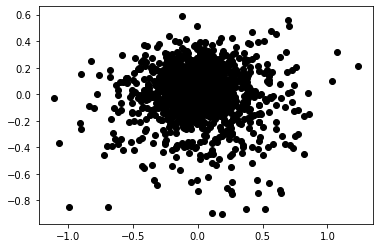

In [335]:
import matplotlib.pyplot as plt
plt.plot(Vp[0], Vp[1], 'o', color='black');
